In [16]:
library(scGOclust)
library(tidyverse)
library(pheatmap)

In [2]:
library(Seurat)

Attaching SeuratObject

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode



In [3]:
httr::set_config(httr::config(ssl_verifypeer = FALSE)) 

In [4]:
mmu_tbl = ensemblToGo(species = 'mmusculus', GO_linkage_type = c('standard' ))
dme_tbl = ensemblToGo(species = 'dmelanogaster', GO_linkage_type = c('standard' ))

start query ENSEMBL via biomaRt

Ensembl site unresponsive, trying useast mirror

including GO link types: 

standard: 

EXP, IDA, IPI, IMP, IGI, IEP, HTP, HDA, HMP, HGI, IBA, IBD, IKR, IRD, ISS, ISO, ISA, ISM, IGC, RCA, TAS, IC

start query ENSEMBL via biomaRt

Ensembl site unresponsive, trying asia mirror

including GO link types: 

standard: 

EXP, IDA, IPI, IMP, IGI, IEP, HTP, HDA, HMP, HGI, IBA, IBD, IKR, IRD, ISS, ISO, ISA, ISM, IGC, RCA, TAS, IC



In [5]:
library(SeuratDisk)

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [6]:
mmu = LoadH5Seurat("mouse_kidney_raw_counts_log1p.h5seurat")

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding scale.data for RNA

Adding feature-level metadata for RNA

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results



In [7]:
dme = LoadH5Seurat("fly_mp_nc_raw_new_anno.h5seurat")

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding feature-level metadata for RNA

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results



In [8]:
mmu

An object of class Seurat 
19125 features across 31265 samples within 1 assay 
Active assay: RNA (19125 features, 0 variable features)
 3 layers present: counts, data, scale.data

In [9]:
dme

An object of class Seurat 
11353 features across 5731 samples within 1 assay 
Active assay: RNA (11353 features, 0 variable features)
 2 layers present: counts, data

In [23]:
dme_go_obj = makeGOSeurat(ensembl_to_GO = dme_tbl, seurat_obj = dme, feature_type = 'ensembl_gene_id')

collect data

compute GO to cell matrix, might take a few secs

time used: 3.42 secs

removing 67 all zero terms

returning GO Seurat object



In [24]:
mmu_go_obj = makeGOSeurat(ensembl_to_GO = mmu_tbl, seurat_obj = mmu, feature_type = 'external_gene_name')

collect data

compute GO to cell matrix, might take a few secs

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.9 GiB”
time used: 37.87 secs

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.9 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.9 GiB”
removing 397 all zero terms

returning GO Seurat object



In [25]:
dme_go_obj

An object of class Seurat 
5007 features across 5731 samples within 1 assay 
Active assay: RNA (5007 features, 0 variable features)
 2 layers present: counts, data

In [26]:
mmu_go_obj

An object of class Seurat 
11867 features across 31265 samples within 1 assay 
Active assay: RNA (11867 features, 0 variable features)
 2 layers present: counts, data

In [27]:
mmu_go_obj = mmu_go_obj[, mmu_go_obj@meta.data['Ontology_name'] != 'nan']

In [28]:
intersection = intersect(rownames(mmu_go_obj), rownames(dme_go_obj))

In [29]:
mmu_go_obj = mmu_go_obj[intersection, ]
dme_go_obj  = dme_go_obj[intersection, ]

In [30]:
dme_ct_go <- getCellTypeGO(go_seurat_obj = dme_go_obj, cell_type_col = 'cell_type_new', norm_log1p = TRUE)

perform normalization and log1p for dme_go_obj

Centering and scaling data matrix



In [31]:
mmu_ct_go <- getCellTypeGO(go_seurat_obj = mmu_go_obj, cell_type_col = 'Ontology_name', norm_log1p = FALSE)

Centering and scaling data matrix



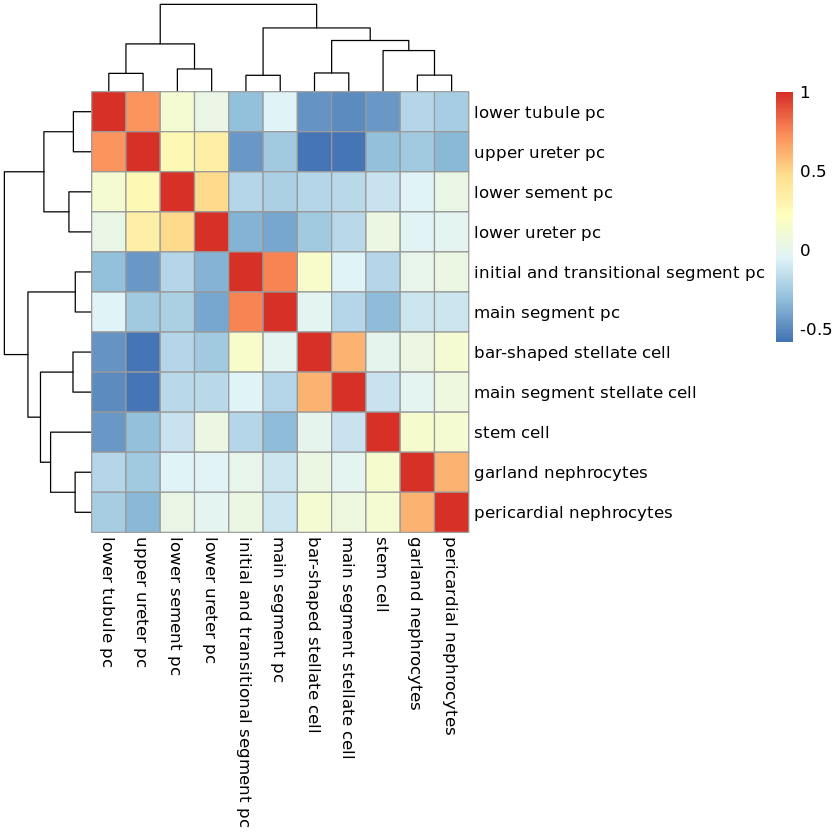

In [32]:
dme_corr = cellTypeGOCorr(cell_type_go = dme_ct_go, corr_method = 'pearson')
pheatmap(dme_corr)

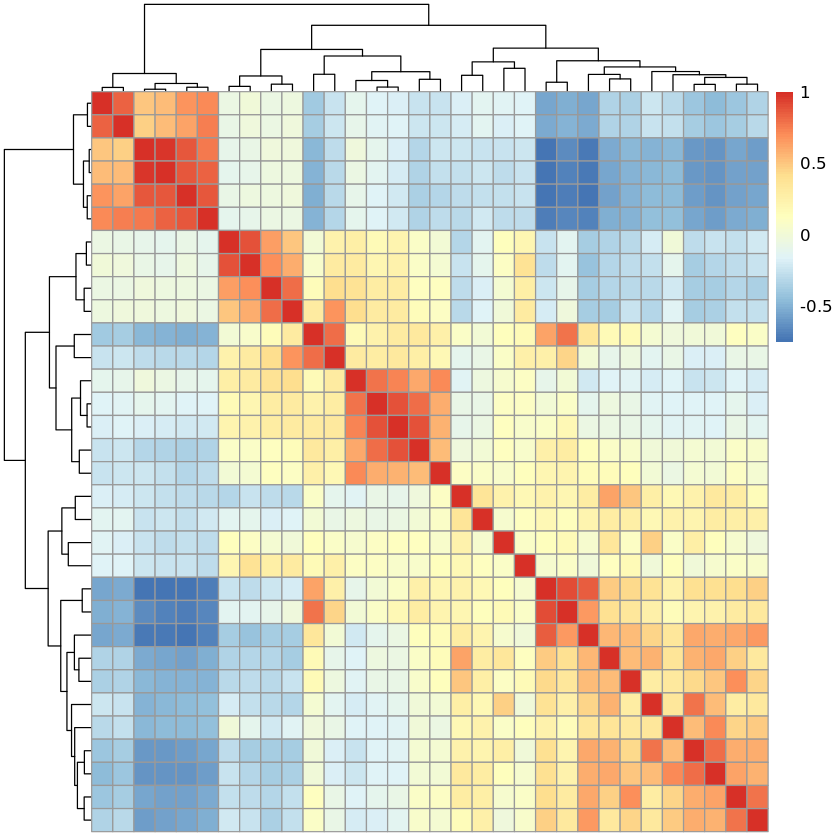

In [33]:
mmu_corr = cellTypeGOCorr(cell_type_go = mmu_ct_go, corr_method = 'pearson')
pheatmap(mmu_corr, show_rownames = FALSE, show_colnames = FALSE)

In [34]:
corr = crossSpeciesCellTypeGOCorr(species_1 = 'mmusculus', species_2 = 'dmelanogaster', cell_type_go_sp1 = mmu_ct_go, cell_type_go_sp2 = dme_ct_go, corr_method = 'pearson')

In [35]:
options(repr.plot.width = 12, repr.plot.height = 12)

In [38]:
plotCellTypeCorrHeatmap(corr_matrix = corr, border_color='black', filename="mouse_fly_renal_corr.pdf", height = 12, width = 12, scale = 'column')

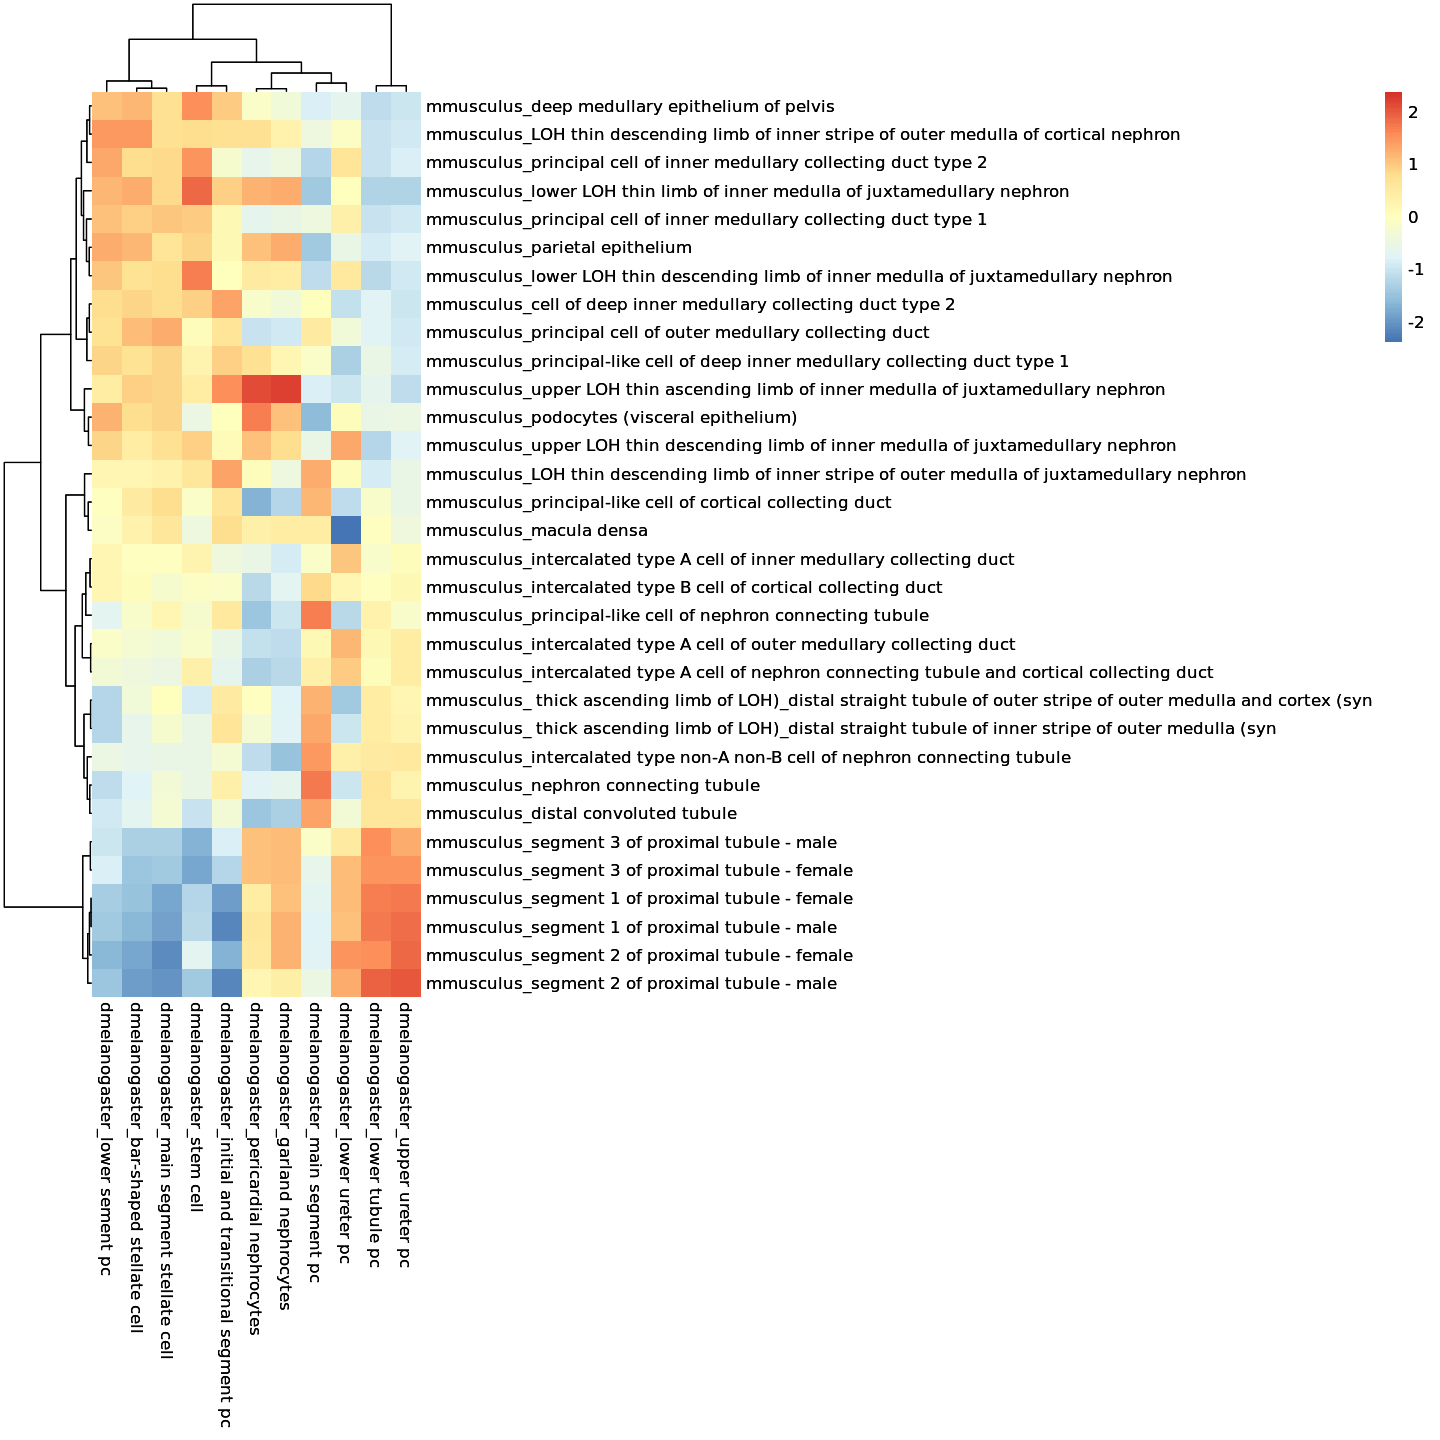

In [39]:
plotCellTypeCorrHeatmap(corr_matrix = corr, border_color='black', scale = 'column')

In [41]:
mmu_go_analyzed = analyzeGOSeurat(go_seurat_obj = mmu_go_obj, cell_type_col = 'Ontology_name', norm_log1p = FALSE)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13195
Number of edges: 629582

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8853
Number of communities: 18
Elapsed time: 1 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:04:53 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

13:04:53 Read 13195 rows and found 50 numeric columns

13:04:53 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

13:04:53 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:04:54 Writing NN index file to 

In [42]:
dme_go_analyzed = analyzeGOSeurat(go_seurat_obj = dme_go_obj, cell_type_col = 'cell_type_new', norm_log1p=TRUE)

perform normalization and log1p for dme_go_obj

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5731
Number of edges: 300280

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8359
Number of communities: 11
Elapsed time: 0 seconds


13:05:38 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

13:05:38 Read 5731 rows and found 50 numeric columns

13:05:38 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

13:05:38 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:05:38 Writing NN index file to temp file /tmp/RtmpbAO8uj/file2d34b863906be8

13:05:38 Searching Annoy index using 1 thread, search_k = 3000

13:05:40 Annoy recall = 100%

13:05:40 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:05:42 Initializing from normalized Laplacian +

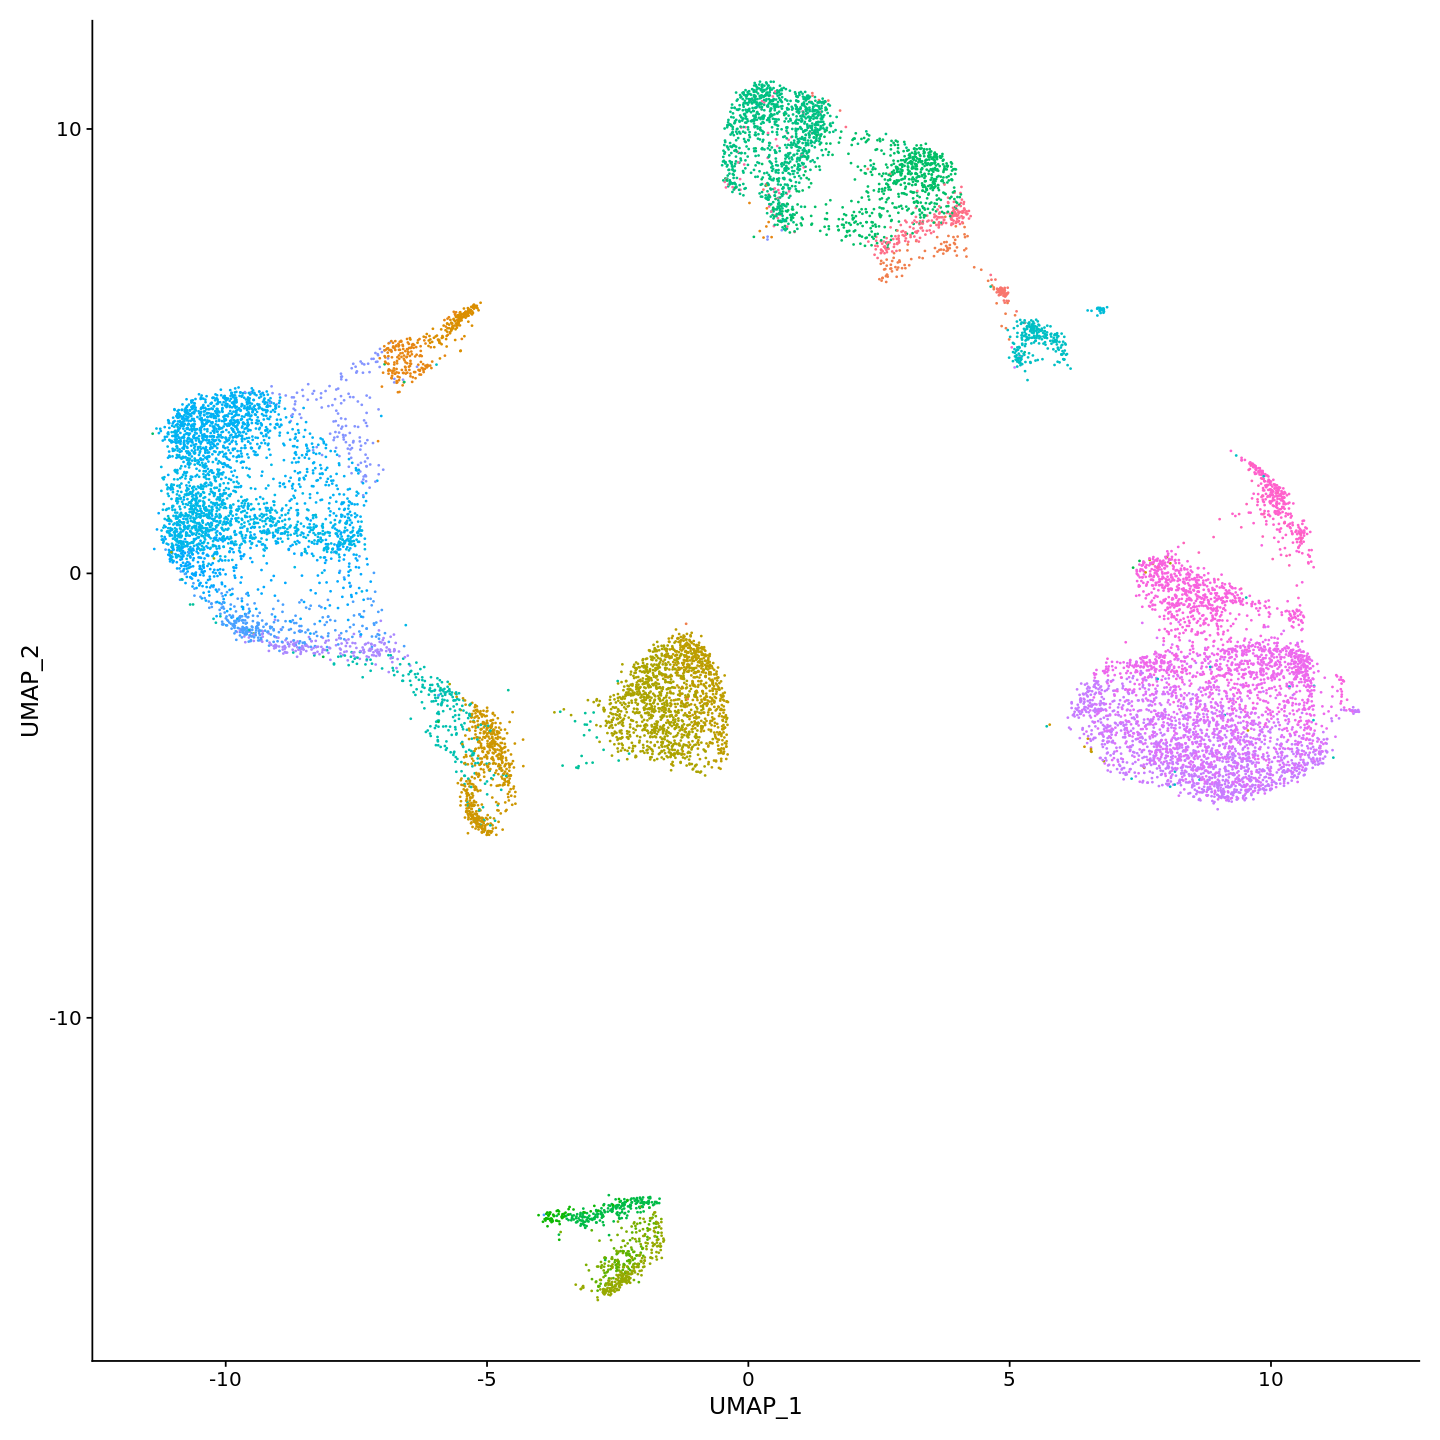

In [45]:
DimPlot(mmu_go_analyzed) + theme(legend.position = 'none')

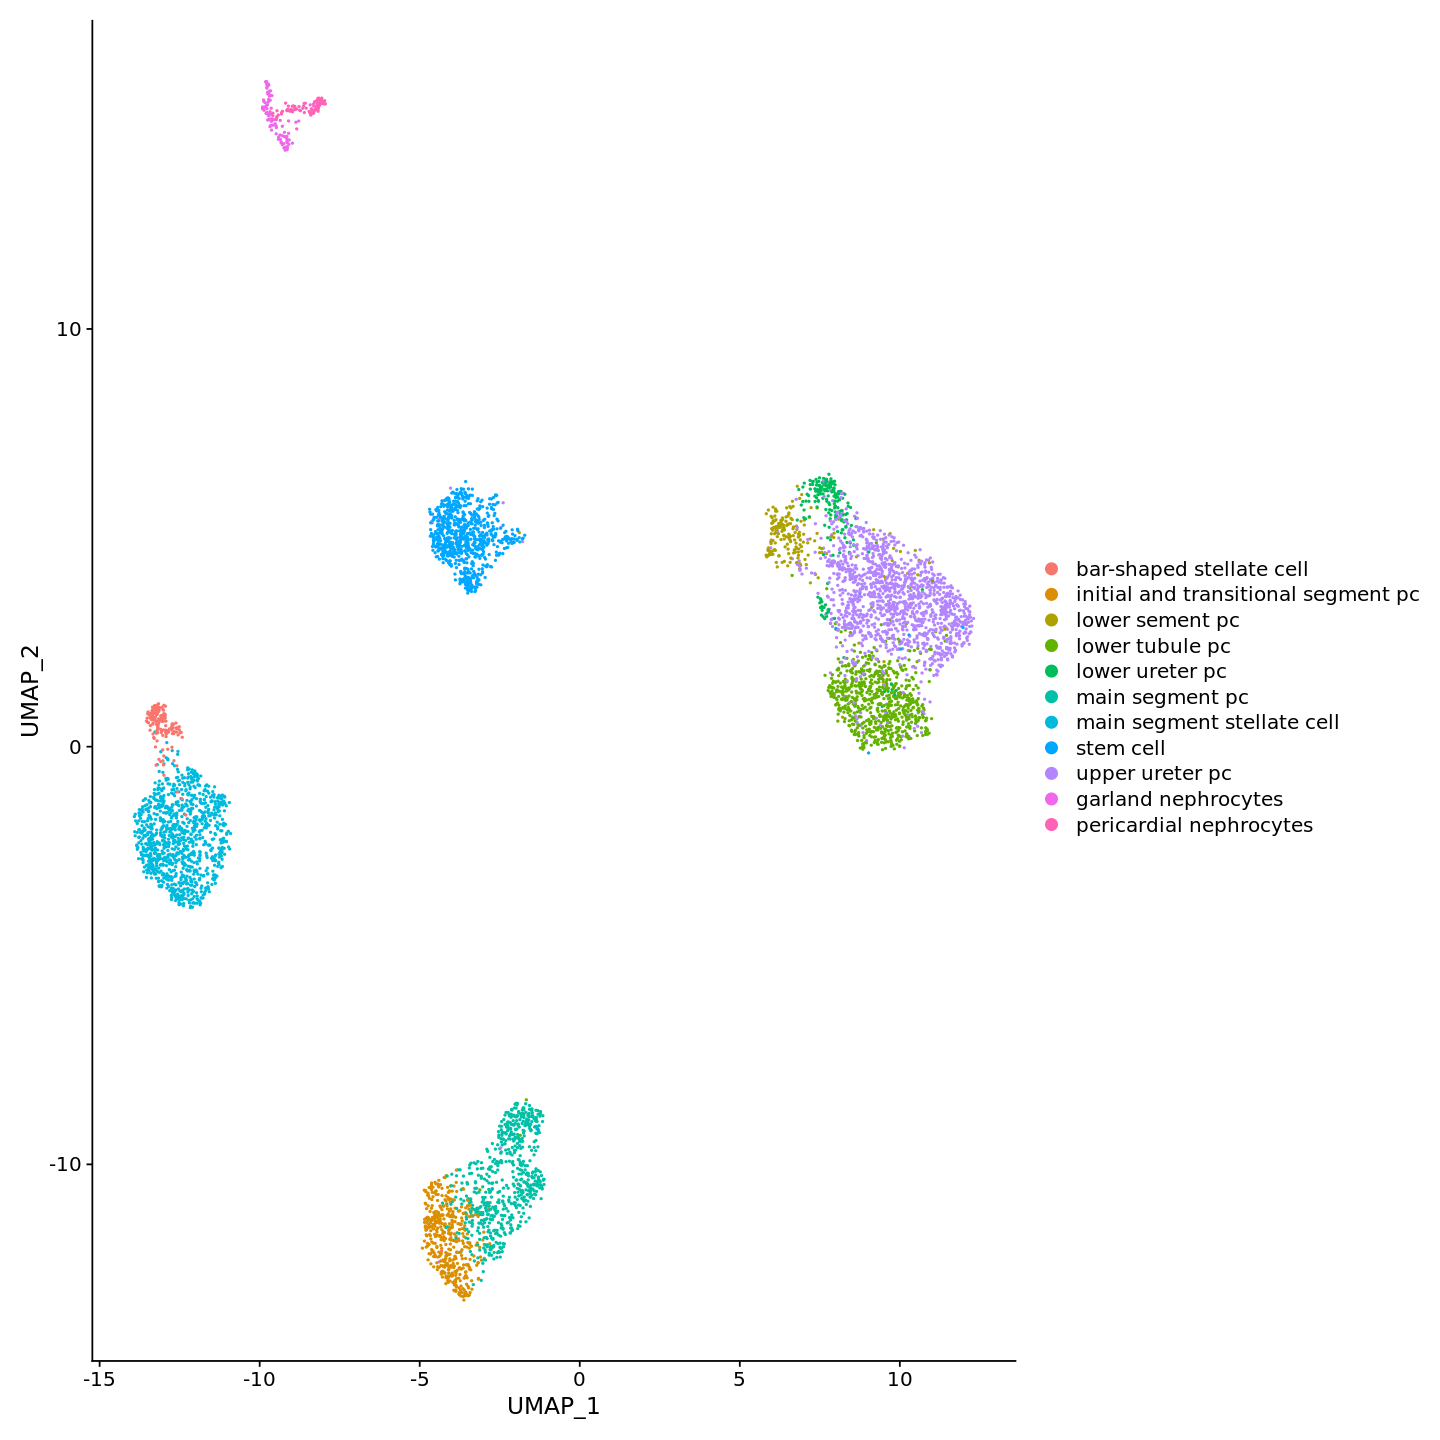

In [46]:
DimPlot(dme_go_analyzed)

In [48]:
shared_go_all = getCellTypeSharedGO(species_1 = 'mmusculus', species_2 = 'dmelanogaster', analyzed_go_seurat_sp1 = mmu_go_analyzed, analyzed_go_seurat_sp2 = dme_go_analyzed, cell_type_col_sp1 = 'Ontology_name', cell_type_col_sp2 = 'cell_type_new')

calculate cell type marker for species mmusculus, this will take a while

Calculating cluster LOH thin descending limb of inner stripe of outer medulla of cortical nephron

Calculating cluster LOH thin descending limb of inner stripe of outer medulla of juxtamedullary nephron

Calculating cluster cell of deep inner medullary collecting duct type 2

Calculating cluster deep medullary epithelium of pelvis

Calculating cluster distal convoluted tubule

Calculating cluster distal straight tubule of inner stripe of outer medulla (syn: thick ascending limb of LOH)

Calculating cluster distal straight tubule of outer stripe of outer medulla and cortex (syn: thick ascending limb of LOH)

Calculating cluster intercalated type A cell of inner medullary collecting duct

Calculating cluster intercalated type A cell of nephron connecting tubule and cortical collecting duct

Calculating cluster intercalated type A cell of outer medullary collecting duct

Calculating cluster intercalated type B cell 

In [49]:
shared_go_all %>% saveRDS("markers_and_shared_sig_markers_kidney.rds")

In [50]:
shared_go_all$shared_sig_markers %>% write_csv("shared_sig_markers_mouse_fly_kidney.csv")

In [51]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.5 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /nfs/research/icortes/ysong/anaconda3/envs/R4.3/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/London
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] pheatmap_1.0.12       SeuratDisk_0.0.0.9021 SeuratObject_5.0.0   
 [4] Seurat_4.3.0.1        lubridate_1.9.2       forcats_1.0.0        
 [7] stringr_1.5.0         dplyr_1.1.3           purrr_1